In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# plt.rc(usetex = True)
def poly_plot2(x_data,y_data,x0,x1,ax,c='b',deg=1):
    try:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    except:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    coeff=res[0]
    k_err=[]
    i2=0;
    for i in res[1]:
        k_err.append(np.sqrt(i[i2]))
        i2+=1
    

    
    y=[]
    x_arr=np.linspace(x0,x1,1000)
    n=len(coeff)-1
    for x in x_arr:
        y_buff=0;
        n_buff=n;
        for i in coeff:
            y_buff+=i*x**n_buff
            n_buff-=1
        y.append(y_buff)
    s='y='
    n=deg
    for k in coeff:
        s+='('+format(k,'.2e')+')'+f'$x^{n}$+'
        n-=1
        
    ax.plot(x_arr,y,c=c,label=s[:-1])
    return coeff,k_err

def poly_plot3(ax,data,x,y,c='b',limits=(0,0),deg=1):
    if limits==(0,0):
        coeffs=poly_plot2(data[x].array,data[y].array,data[x].min(),data[x].max(),ax,c,deg=deg)
    else:
        coeffs=poly_plot2(data[x].array,data[y].array,limits[0],limits[1],ax,c,deg=deg)
    return coeffs

In [3]:
data=pd.read_csv("table1.csv")
data.head()

,U,I_screen,I_anode
0,1.00,0.01,4.49
1,1.41,0.01,4.49
2,1.78,0.03,4.50
3,2.20,0.04,4.51
4,2.59,0.09,4.53


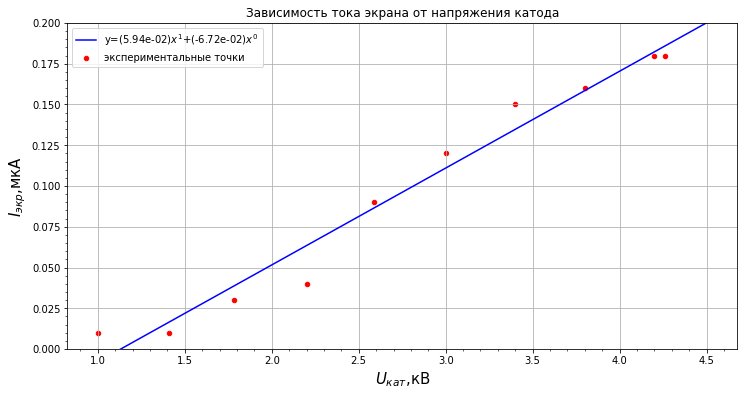

In [4]:
fig,ax=plt.subplots(figsize=(12,6))
data.plot(ax=ax,kind='scatter',x="U",y="I_screen",c='r',label="экспериментальные точки")
poly_plot2(data["U"],data["I_screen"],1,4.5,ax=ax)
plt.grid()
ax.minorticks_on()


plt.title("Зависимость тока экрана от напряжения катода",size=12)
plt.ylabel(r"$I_{экр}$,мкА",size=15)
plt.xlabel(r"$U_{кат}$,кВ",size=15)
plt.legend()
plt.ylim((0,0.20))
fig.savefig("graph1.pdf")

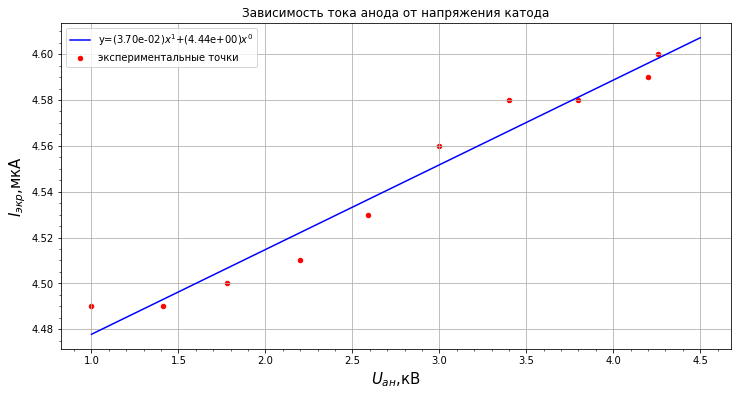

In [5]:
fig,ax=plt.subplots(figsize=(12,6))
data.plot(ax=ax,kind='scatter',x="U",y="I_anode",c='r',label="экспериментальные точки")
poly_plot2(data["U"],data["I_anode"],1,4.5,ax=ax)
plt.grid()
ax.minorticks_on()


plt.title("Зависимость тока анода от напряжения катода",size=12)
plt.ylabel(r"$I_{экр}$,мкА",size=15)
plt.xlabel(r"$U_{ан}$,кВ",size=15)
plt.legend()
# plt.ylim((0,0.20))
fig.savefig("graph2.pdf")

In [6]:
data2=pd.read_csv("table2.csv")
data2.head()

,U_mkp,I_mkp,I_anode
0,0.50,2.09,1.04
1,0.75,3.12,1.50
2,1.00,4.22,2.11
3,1.25,5.32,2.68
4,1.50,6.45,3.26


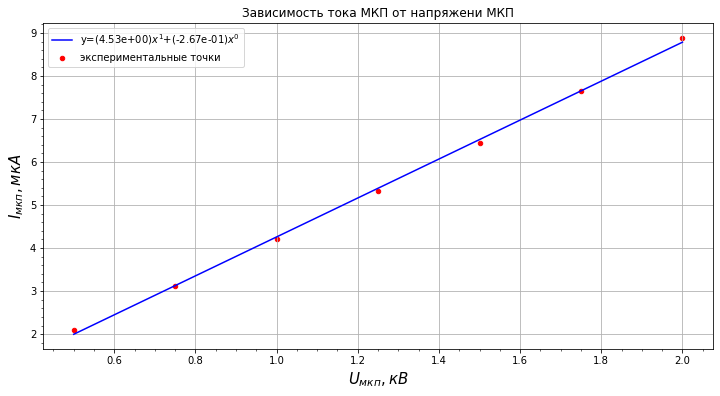

In [7]:
fig,ax=plt.subplots(figsize=(12,6))
data2.plot(ax=ax,kind="scatter",x="U_mkp",y="I_mkp",c='r',label="экспериментальные точки")
poly_plot3(ax=ax,data=data2,x="U_mkp",y="I_mkp")

plt.grid()
ax.minorticks_on()

plt.title("Зависимость тока МКП от напряжени МКП")
plt.xlabel("$U_{мкп},кВ$",size=15)
plt.ylabel(r"$I_{мкп},мкА$",size=15)
plt.legend()

fig.savefig("graph3.pdf")

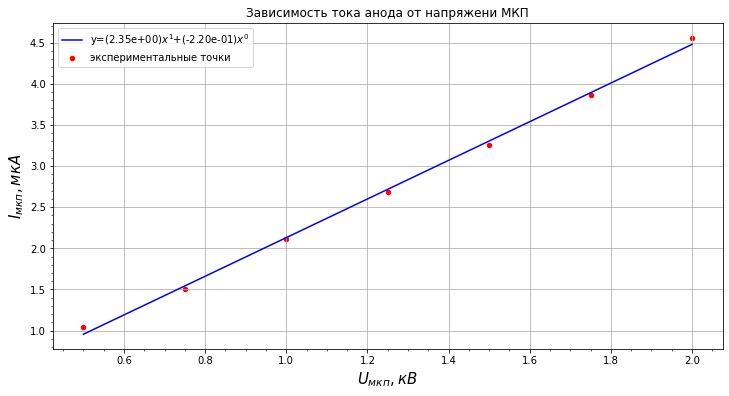

In [8]:
fig,ax=plt.subplots(figsize=(12,6))
data2.plot(ax=ax,kind="scatter",x="U_mkp",y="I_anode",c='r',label="экспериментальные точки")
poly_plot3(ax=ax,data=data2,x="U_mkp",y="I_anode")

plt.grid()
ax.minorticks_on()

plt.title("Зависимость тока анода от напряжени МКП")
plt.xlabel("$U_{мкп},кВ$",size=15)
plt.ylabel(r"$I_{мкп},мкА$",size=15)
plt.legend()

fig.savefig("graph4.pdf")

In [9]:
data3=pd.read_csv("table3.csv")
data3.head()

,U_screen,I_screen
0,1.0,0.09
1,1.3,0.10
2,1.6,0.10
3,1.9,0.11
4,2.2,0.11


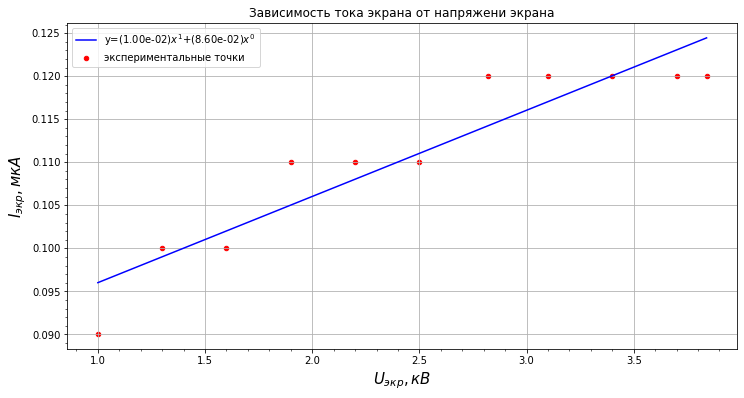

In [10]:
fig,ax=plt.subplots(figsize=(12,6))
data3.plot(ax=ax,kind="scatter",x="U_screen",y="I_screen",c='r',label="экспериментальные точки")
poly_plot3(ax=ax,data=data3,x="U_screen",y="I_screen")

plt.grid()
ax.minorticks_on()

plt.title("Зависимость тока экрана от напряжени экрана")
plt.xlabel("$U_{экр},кВ$",size=15)
plt.ylabel(r"$I_{экр},мкА$",size=15)
plt.legend()

fig.savefig("graph5.pdf")

In [11]:
data4=pd.read_csv("table4.csv")
data4.head()

,U_katode,I_katode
0,1.02,0.01
1,1.30,0.01
2,1.60,0.01
3,1.90,0.01
4,2.20,0.02


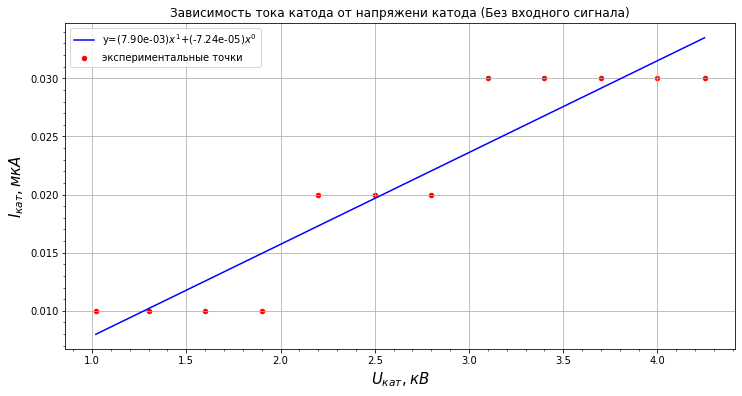

In [12]:
fig,ax=plt.subplots(figsize=(12,6))
data4.plot(ax=ax,kind="scatter",x="U_katode",y="I_katode",c='r',label="экспериментальные точки")
poly_plot3(ax=ax,data=data4,x="U_katode",y="I_katode")

plt.grid()
ax.minorticks_on()

plt.title("Зависимость тока катода от напряжени катода (Без входного сигнала)")
plt.xlabel("$U_{кат},кВ$",size=15)
plt.ylabel(r"$I_{кат},мкА$",size=15)
plt.legend()

fig.savefig("graph6.pdf")

In [13]:
data5=pd.read_csv("table5.csv")
data5.head()

,U_mkp,I_mkp,I_anode
0,0.50,2.08,1.03
1,0.65,2.72,1.36
2,0.80,3.36,1.69
3,0.95,4.00,2.01
4,1.10,4.67,2.35


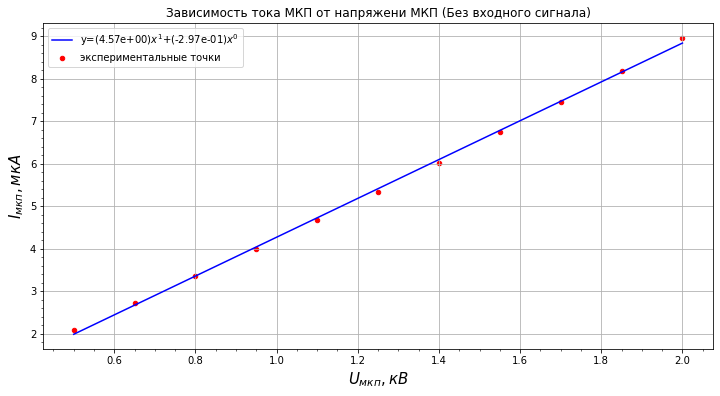

In [14]:
fig,ax=plt.subplots(figsize=(12,6))
data5.plot(ax=ax,kind="scatter",x="U_mkp",y="I_mkp",c='r',label="экспериментальные точки")
poly_plot3(ax=ax,data=data5,x="U_mkp",y="I_mkp")

plt.grid()
ax.minorticks_on()

plt.title("Зависимость тока МКП от напряжени МКП (Без входного сигнала)")
plt.xlabel("$U_{мкп},кВ$",size=15)
plt.ylabel(r"$I_{мкп},мкА$",size=15)
plt.legend()

fig.savefig("graph7.pdf")

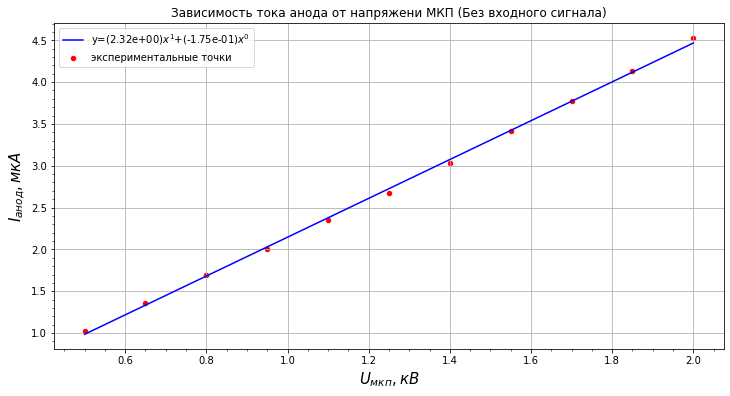

In [15]:
fig,ax=plt.subplots(figsize=(12,6))
data5.plot(ax=ax,kind="scatter",x="U_mkp",y="I_anode",c='r',label="экспериментальные точки")
poly_plot3(ax=ax,data=data5,x="U_mkp",y="I_anode")

plt.grid()
ax.minorticks_on()

plt.title("Зависимость тока анода от напряжени МКП (Без входного сигнала)")
plt.xlabel("$U_{мкп},кВ$",size=15)
plt.ylabel(r"$I_{анод},мкА$",size=15)
plt.legend()

fig.savefig("graph8.pdf")

In [16]:
data6=pd.read_csv("table6.csv")
data6.head()

,U_katode,U_mkp
0,1.5,1.82
1,1.7,1.65
2,1.9,1.50
3,2.1,1.40
4,2.3,1.30


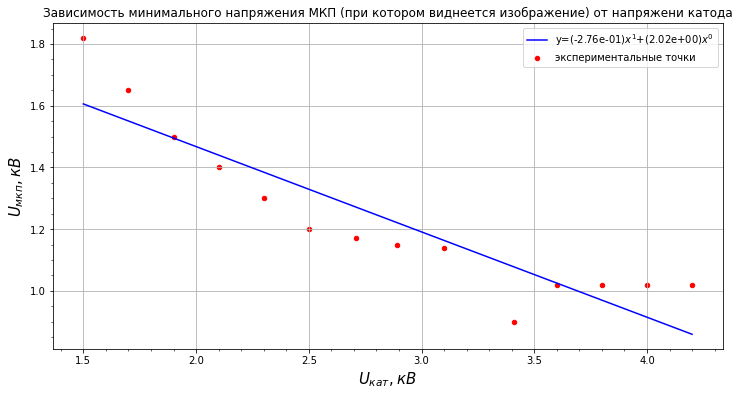

In [17]:
fig,ax=plt.subplots(figsize=(12,6))
data6.plot(ax=ax,kind="scatter",x="U_katode",y="U_mkp",c='r',label="экспериментальные точки")
poly_plot3(ax=ax,data=data6,x="U_katode",y="U_mkp")

plt.grid()
ax.minorticks_on()

plt.title("Зависимость минимального напряжения МКП (при котором виднеется изображение) от напряжени катода")
plt.xlabel("$U_{кат},кВ$",size=15)
plt.ylabel(r"$U_{мкп},кВ$",size=15)
plt.legend()

fig.savefig("graph9.pdf")

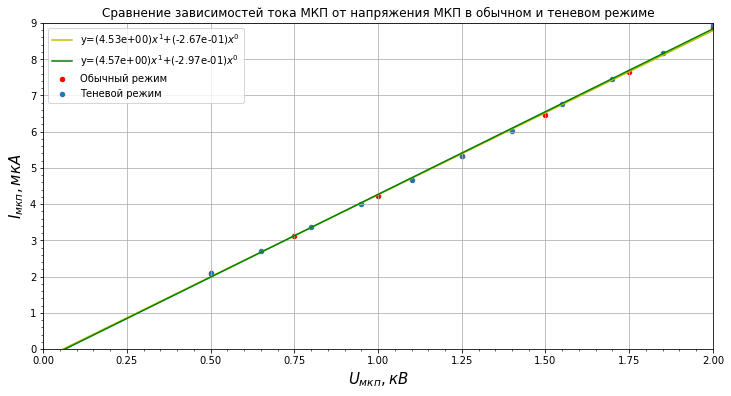

In [67]:
fig,ax=plt.subplots(figsize=(12,6))
data2.plot(ax=ax,kind="scatter",x="U_mkp",y="I_mkp",c="r",label="Обычный режим")
data5.plot(ax=ax,kind="scatter",x="U_mkp",y="I_mkp",label="Теневой режим")
k1=poly_plot3(ax=ax,data=data2,x="U_mkp",y="I_mkp",c='y',limits=(0,2))
k2=poly_plot3(ax=ax,data=data5,x="U_mkp",y="I_mkp",c='g',limits=(0,2))
plt.legend()
plt.title("Сравнение зависимостей тока МКП от напряжения МКП в обычном и теневом режиме")
plt.xlabel("$U_{мкп},кВ$",size=15)
plt.ylabel("$I_{мкп},мкА$",size=15)
data.plot
ax.minorticks_on()
plt.xlim(0,2)
plt.ylim(0,9)
plt.grid()
fig.savefig("graph10.pdf")

In [41]:
data2

,U_mkp,I_mkp,I_anode
0,0.50,2.09,1.04
1,0.75,3.12,1.50
2,1.00,4.22,2.11
3,1.25,5.32,2.68
4,1.50,6.45,3.26
5,1.75,7.65,3.87
6,2.00,8.89,4.56


In [42]:
data5

,U_mkp,I_mkp,I_anode
0,0.50,2.08,1.03
1,0.65,2.72,1.36
2,0.80,3.36,1.69
3,0.95,4.00,2.01
4,1.10,4.67,2.35
5,1.25,5.34,2.68
6,1.40,6.01,3.03
7,1.55,6.75,3.41
8,1.70,7.46,3.77
9,1.85,8.17,4.13


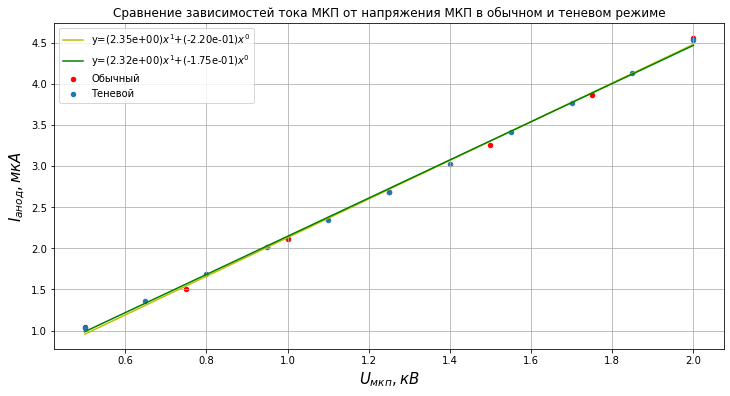

In [52]:
fig,ax=plt.subplots(figsize=(12,6))
data2.plot(ax=ax,kind="scatter",x="U_mkp",y="I_anode",c="r",label="Обычный")
data5.plot(ax=ax,kind="scatter",x="U_mkp",y="I_anode",label="Теневой")
poly_plot3(ax=ax,data=data2,x="U_mkp",y="I_anode",c='y')
poly_plot3(ax=ax,data=data5,x="U_mkp",y="I_anode",c='g')
plt.legend()
plt.title("Сравнение зависимостей тока МКП от напряжения МКП в обычном и теневом режиме")
plt.xlabel("$U_{мкп},кВ$",size=15)
plt.ylabel("$I_{анод},мкА$",size=15)
data.plot
plt.grid()